In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 22.0M/22.0M [00:02<00:00, 7.79MB/s]

Extracting files...


Path to dataset files: /Users/ivanangelov/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [10]:
(train_img, train_label), (test_img, test_label) = keras.datasets.mnist.load_data()

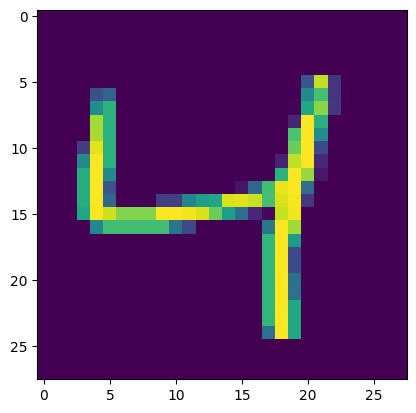

In [11]:
train_label
plt.imshow(train_img[2])

In [12]:
train_img, test_img = train_img/255, test_img/255

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,971 (410.04 KB)

 Trainable params: 104,971 (410.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(train_img, train_label, epochs=6, validation_split=0.2)

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9991 - loss: 0.0042 - val_accuracy: 0.9745 - val_loss: 0.3069
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9754 - val_loss: 0.2826
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9769 - val_loss: 0.2927
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9764 - val_loss: 0.2886
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9751 - val_loss: 0.2949
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9749 - val_loss: 0.2936


In [30]:
y_prob = model.predict(test_img)
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(test_label, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


0.9791

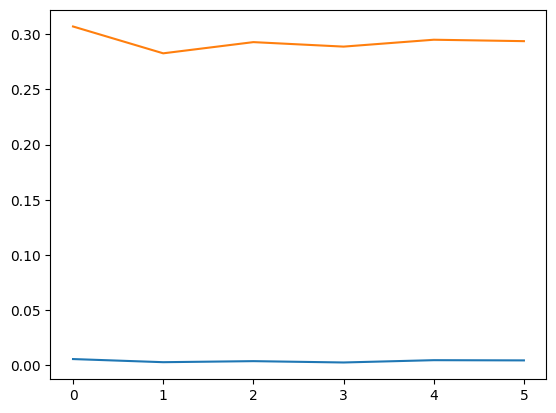

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

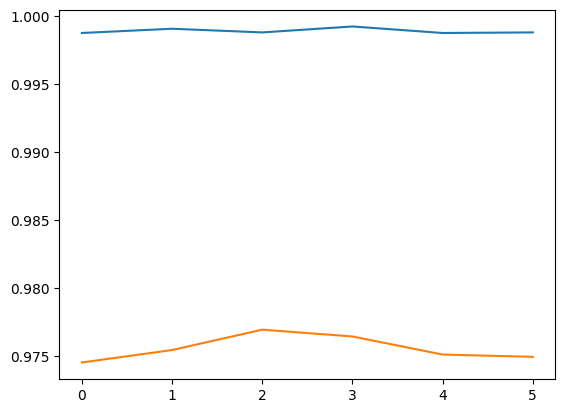

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted digit: 0


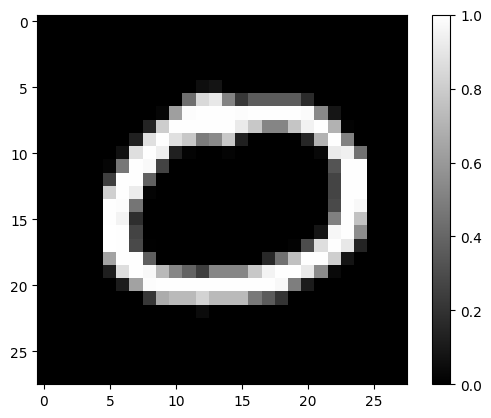

In [60]:
import numpy as np
image_idx = 69
single_image = test_img[image_idx]
single_image = np.expand_dims(single_image, axis=0)

predictions = model.predict(single_image)
predicted_label = np.argmax(predictions, axis=1)
print(f"Predicted digit: {predicted_label[0]}")

plt.figure()
plt.imshow(test_img[image_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()